<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/creditcard_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine learning (2) - Final Project

###Team members:


*  Shihab Battah
*  Naseem Ananzeh
*  Rama Jaradat

*  Fatin Jaddo

IMPORTANT FOR TEAM
---
Kaggle Summary – Credit Card Fraud Detection Dataset

* Instances: 284,807 transactions

* Features: 30 total (28 PCA features + Time, Amount)

* Target: Class (1 = Fraud, 0 = Not Fraud)

* Data Type: All numerical

* Fraud Rate: 0.172% (492 frauds)







--------------------------------------------------------

    








>

#   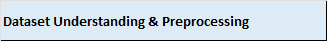

##**loading the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('creditcard.csv')

#Dataset Preview (First 10 rows)
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [3]:
data.shape

(99121, 31)

In [4]:
#Dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99121 entries, 0 to 99120
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    99121 non-null  int64  
 1   V1      99121 non-null  float64
 2   V2      99121 non-null  float64
 3   V3      99121 non-null  float64
 4   V4      99121 non-null  float64
 5   V5      99121 non-null  float64
 6   V6      99121 non-null  float64
 7   V7      99121 non-null  float64
 8   V8      99121 non-null  float64
 9   V9      99121 non-null  float64
 10  V10     99121 non-null  float64
 11  V11     99121 non-null  float64
 12  V12     99121 non-null  float64
 13  V13     99121 non-null  float64
 14  V14     99121 non-null  float64
 15  V15     99121 non-null  float64
 16  V16     99121 non-null  float64
 17  V17     99121 non-null  float64
 18  V18     99121 non-null  float64
 19  V19     99121 non-null  float64
 20  V20     99121 non-null  float64
 21  V21     99120 non-null  float64
 22

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,99121.000000,...,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000,99120.000000
mean,42213.815861,-0.262004,-0.033117,0.676050,0.162447,-0.279002,0.094272,-0.108333,0.056136,-0.045671,...,-0.030524,-0.109128,-0.036949,0.009122,0.132233,0.026676,0.000626,0.001712,98.115561,0.002240
std,16959.616226,1.860400,1.658620,1.325288,1.350168,1.356758,1.301340,1.212608,1.207004,1.122196,...,0.719862,0.634433,0.634429,0.594982,0.441032,0.494743,0.393954,0.325556,265.286809,0.047273
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33380.000000,-1.027973,-0.599728,0.177007,-0.712131,-0.898502,-0.647594,-0.600418,-0.137605,-0.699085,...,-0.224552,-0.531169,-0.176426,-0.323574,-0.131810,-0.325217,-0.062543,-0.005363,7.570000,0.000000
50%,44112.000000,-0.260205,0.077775,0.754452,0.191743,-0.314473,-0.157188,-0.069316,0.073908,-0.118182,...,-0.057606,-0.083721,-0.049300,0.064890,0.170100,-0.070453,0.009817,0.023319,26.430000,0.000000
75%,55528.000000,1.153321,0.735516,1.376924,1.032558,0.249811,0.486727,0.415134,0.359821,0.560705,...,0.119279,0.308336,0.081573,0.406241,0.419958,0.301190,0.082976,0.076518,89.000000,0.000000
max,66973.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [15]:
# Finding out which features(Columns) have missing values
data.isnull().sum()

# Nice! The dataset has no null values

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [7]:
# We dropped the Time column because it’s not useful for detecting fraud
data=data.drop(['Time'],axis=1)
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99116,1.383003,-1.100025,0.514116,-1.264196,-1.560304,-0.735428,-0.929887,-0.144582,-1.879341,1.378773,...,-0.142905,-0.065429,0.072115,0.379578,0.258220,-0.200665,0.040191,0.027242,50.00,0.0
99117,-1.589012,0.449203,1.341944,0.152955,-0.071734,-0.711538,1.634046,-0.260976,-0.533781,-0.572326,...,0.042474,0.129532,-0.198981,0.392406,0.806917,-0.402612,0.213197,0.145531,229.32,0.0
99118,0.990739,-0.322129,1.133347,0.640936,-0.212743,1.755410,-0.906331,0.629480,0.798532,-0.454900,...,0.037755,0.485242,0.147119,-0.898490,-0.034857,0.442509,0.092761,0.014600,11.50,0.0
99119,-0.576857,1.215356,0.943351,-0.498420,0.879226,0.015361,0.954065,-0.272786,0.090732,0.700778,...,-0.452060,-0.774950,-0.221622,-0.907269,0.019926,0.079747,0.122782,-0.241301,1.98,0.0


In [8]:
from sklearn.preprocessing import StandardScaler

# Scale the Amount feature
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.194147,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.359709,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.057519,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.095687,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.106020,0.0


In [9]:
#data.duplicated().sum()

In [10]:
#data=data.drop_duplicates()
data.shape

(99121, 30)

In [11]:
data['Class'].value_counts()

,count
Class,
0.0,98898
1.0,222


In [12]:
#split the data because we don't need the class column
X = data.drop(['Class'], axis=1)
y = data['Class']

<Axes: ylabel='count'>

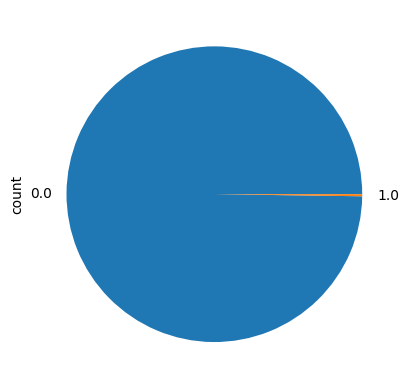

In [13]:
data['Class'].value_counts().plot.pie()

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

#Techniques and Algorithms You Must Apply


##**Dimensionality Reduction**

**Note**:There is a good Correlation between the Feature , for that we need  ***PCA*** for reduce the dimensionality and data become ***uncorlleted***

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axhline(y=0.95, color='g', linestyle='--')
plt.show()

In [ ]:
pca = PCA(n_components=18)
X_reduced = pca.fit_transform(X)


In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

print(f"the minimum number of components preserving 90–95% variance: {n_components}")

pca_reduced = PCA(n_components=n_components)
x_pca_reduced = pca_reduced.fit_transform(X_reduced)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of Credit Card Fraud')
plt.colorbar(label='Class')
plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_Sample=X_reduced[:2500,:]
X_tsne_before=tsne.fit_transform(X_Sample)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_Sample)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K_range = range(2, 11)

inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_Sample)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_Sample, labels))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method - Inertia vs. k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid()

# رسم Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs. k')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
X_tsne_after = tsne.fit_transform(X_Sample)


In [ ]:
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne_before[:, 0], y=X_tsne_before[:, 1])
plt.title("t-SNE Before Clustering")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne_after[:, 0], y=X_tsne_after[:, 1], hue=clusters, palette='Set2')
plt.title("t-SNE After Clustering")

plt.tight_layout()
plt.show()